<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('movies.csv', sep=',')
df = df.drop(["Unnamed: 0"], axis=1).reset_index(drop=True)

In [108]:
df.shape

(918, 10)

In [109]:
df.dtypes

Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

In [110]:
df["World Sales (in $)"].min()

81600000

In [111]:
df["World Sales (in $)"].max()

2847246203

In [112]:
df.describe()

,Domestic Sales (in $),International Sales (in $),World Sales (in $)
count,9.180000e+02,9.180000e+02,9.180000e+02
mean,1.677469e+08,2.301434e+08,3.968668e+08
std,1.040360e+08,2.176011e+08,3.082629e+08
min,8.036084e+07,2.600000e+02,8.160000e+07
25%,1.016071e+08,8.845620e+07,2.005564e+08
50%,1.321351e+08,1.638819e+08,3.019416e+08
75%,1.913905e+08,2.885577e+08,4.750718e+08
max,9.366622e+08,2.086739e+09,2.847246e+09


In [113]:
df["Distributor"].unique()

array(['Walt Disney Studios Motion Pictures', 'Twentieth Century Fox',
       'Sony Pictures Entertainment (SPE)', 'Paramount Pictures',
       'Universal Pictures', 'Warner Bros.', 'DreamWorks Distribution',
       'Lionsgate', 'DreamWorks', 'New Line Cinema', 'Newmarket Films',
       'Summit Entertainment', 'Columbia Pictures', 'IFC Films',
       'TriStar Pictures', 'Orion Pictures', 'Metro-Goldwyn-Mayer (MGM)',
       'Miramax', 'The Weinstein Company', 'Fox Searchlight Pictures',
       'Revolution Studios', 'Artisan Entertainment',
       'Sony Pictures Classics', 'United Artists', 'Screen Gems',
       'USA Films', '20th Century Studios', 'STX Entertainment',
       'Dimension Films', 'United Artists Releasing', 'FilmDistrict',
       'Focus Features', 'Relativity Media', 'Roadside Attractions'],
      dtype=object)

In [114]:
df["License"].value_counts()

License
PG-13    363
R        194
PG       173
G         14
Name: count, dtype: int64

In [115]:
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


🔹 **Задание 1. Первичный анализ данных**

1. Загрузите файл в датафрейм и выведите первые 5 строк (Подсказка: найти в документации pandas, как читать csv файл, выставить разделителем запятую).
2. Первый столбец - индекс, который перезаписался как отдельный столбец: удалите его
3. Определите и выведите:

* количество строк и столбцов

* типы данных

* общую информацию по таблице и краткую статистику по числовым столбцам

* минимальное и максимальное значение по мировым сборам

* уникальные жанры

* количество фильмов по каждому рейтингу

In [116]:
df.isna().sum()

Title                           0
Movie Info                      0
Distributor                     0
Release Date                  118
Domestic Sales (in $)           0
International Sales (in $)      0
World Sales (in $)              0
Genre                           0
Movie Runtime                   0
License                       174
dtype: int64

In [117]:
df["License"] = df["License"].fillna(df["License"].mode()[0])

In [118]:
df = df.dropna().reset_index(drop=True)

In [119]:
df["Share of Domestic Sales in comparison with World Sales (in $)"] = (df["Domestic Sales (in $)"] * 100)/ df["World Sales (in $)"]

In [120]:
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Share of Domestic Sales in comparison with World Sales (in $)
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,45.259841
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,30.683560
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,26.710287
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,"December 19, 1997",659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,29.948664
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,"June 10, 2015",652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,39.052930


🔹 **Задание 2. Обработка пропусков и создание новых признаков**

1. Проверьте, в каких столбцах есть пропуски.
2. Замените пропуски в столбце с рейтингом на самое частотное значение (Подсказка: заменить на mode()[0]).
3. Удалите все строки с пропусками в дате релиза.
3. Добавьте новый столбец: доля домашних сборов относительно мировых.

In [121]:
df["Release Date"] = pd.to_datetime(df["Release Date"])

In [122]:
df["Year"] = df["Release Date"].dt.year

In [123]:
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Share of Domestic Sales in comparison with World Sales (in $),Year
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,45.259841,2015
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,30.683560,2019
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,26.710287,2009
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,29.948664,1997
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,39.052930,2015


🔹 **Задание 3. Работа с датами**

1. Преобразуйте столбец Release Date в тип datetime (Подсказка: найти в документации pandas, как вызывать функцию to_datetime).
2. Добавьте новый столбец Year, извлекая из даты только год (Подсказка: найти в документации pandas, как вызывать функцию dt.year).

In [124]:
df.loc[(df["Domestic Sales (in $)"]>70000000), ["Title", "Domestic Sales (in $)"]].head()

,Title,Domestic Sales (in $)
0,Star Wars: Episode VII - The Force Awakens (2015),936662225
1,Avengers: Endgame (2019),858373000
2,Avatar (2009),760507625
3,Titanic (1997),659363944
4,Jurassic World (2015),652385625


🔹 **Задание 4. Фильтрация данных и срезы**

1. Найдите и выведите фильмы с 10 по 20 строку:

* с домашними сборами больше 70 миллионов (только столбцы с названиями фильмов и домашними сборами)

* со мстителями (в названии есть "Avengers") (только столбцы с названиями фильмов и описанием)

* 20-ого века и студии Paramount Pictures (только столбцы с названиями фильмов, годом и студией)

2. Отсортируйте и пересохраните таблицу в порядке убывания мировых сборов.

In [125]:
df.loc[(df["Title"].str.contains("Avengers")), ["Title", "Movie Info"]]

,Title,Movie Info
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...
5,The Avengers (2012),Earth's mightiest heroes must come together an...
15,Avengers: Age of Ultron (2015),When Tony Stark and Bruce Banner try to jump-s...


In [126]:
df.loc[(df["Year"]<2000) & (df["Distributor"].str.contains("Paramount Pictures")), ["Title", "Distributor", "Year"]].head()

,Title,Distributor,Year
3,Titanic (1997),Paramount Pictures,1997
59,Forrest Gump (1994),Paramount Pictures,1994
118,Indiana Jones and the Raiders of the Lost Ark ...,Paramount Pictures,1981
155,Ghost (1990),Paramount Pictures,1990
198,Indiana Jones and the Last Crusade (1989),Paramount Pictures,1989


In [127]:
df.sort_values(["World Sales (in $)"], ascending=False, inplace=True)

In [128]:
df.reset_index(drop=True).head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Share of Domestic Sales in comparison with World Sales (in $),Year
0,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,26.710287,2009
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,30.683560,2019
2,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",3 hr 14 min,PG-13,29.948664,1997
3,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,45.259841,2015
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",2 hr 4 min,PG-13,39.052930,2015


In [129]:
movies_per_year = (
    df.groupby("Year")["Title"]
    .count()
    .reset_index()
)


In [130]:
movies_per_year.head(20)

,Year,Title
0,1972,1
1,1975,1
2,1977,1
3,1978,2
4,1979,2
5,1980,1
6,1981,2
7,1982,2
8,1983,2
9,1984,2


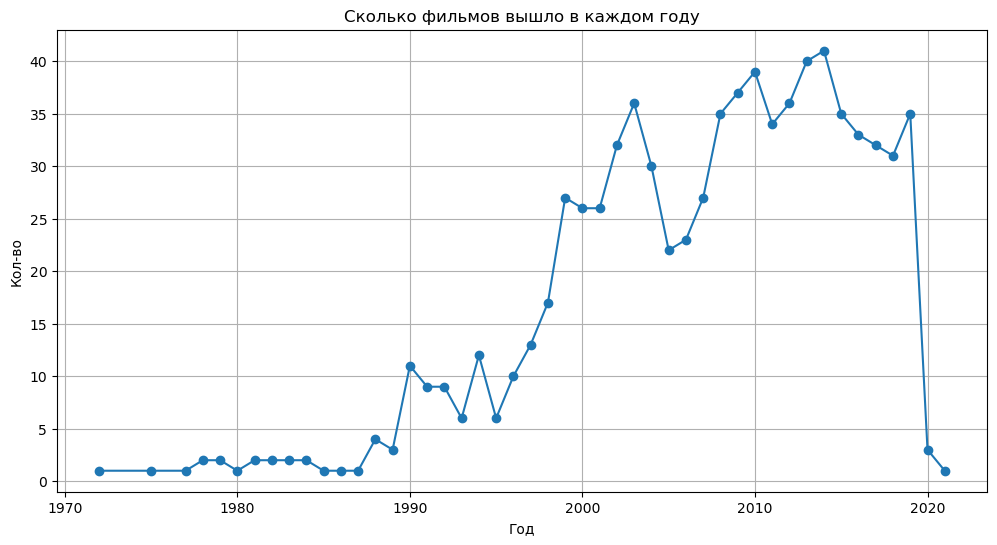

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(movies_per_year["Year"], 
         movies_per_year["Title"],
         marker="o")
plt.title("Сколько фильмов вышло в каждом году")
plt.xlabel("Год")
plt.ylabel("Кол-во")
plt.grid(True)
plt.show()

In [132]:
agg_sum = (
    df.groupby("Distributor")
      .agg(sum_world=("World Sales (in $)", "sum"), movies_per_year=("Title", "count"))
      .reset_index()
)

In [133]:
agg_sum.head(20)

,Distributor,sum_world,movies_per_year
0,Artisan Entertainment,248639099,1
1,Columbia Pictures,1288912626,6
2,Dimension Films,1223005113,7
3,DreamWorks,9917749677,19
4,DreamWorks Distribution,5272576107,16
5,FilmDistrict,332189519,2
6,Focus Features,415922809,2
7,Fox Searchlight Pictures,940181269,3
8,IFC Films,368744044,1
9,Lionsgate,6930240507,16


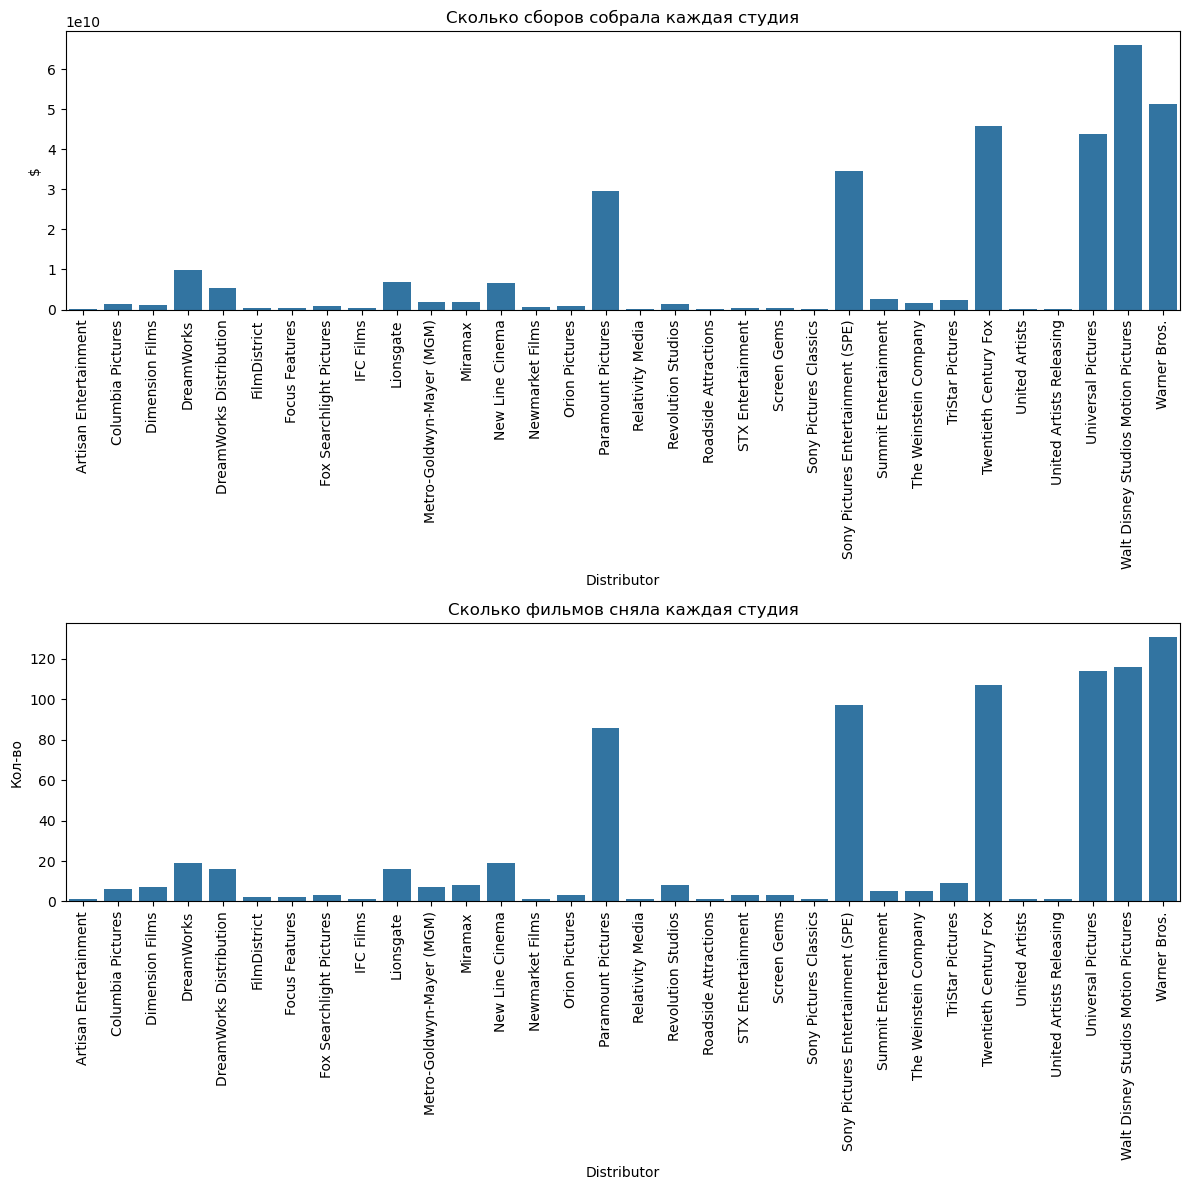

In [134]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)

sns.barplot(data=agg_sum, x="Distributor", y="sum_world")
plt.title("Сколько сборов собрала каждая студия")
plt.ylabel("$")
plt.xticks(rotation=90)

plt.subplot(2, 1, 2)


sns.barplot(data=agg_sum, x="Distributor", y="movies_per_year")
plt.title("Сколько фильмов сняла каждая студия")
plt.ylabel("Кол-во")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

🔹 **Задание 5. Группировка, агрегация и визуализация**

1. Создайте таблицу с группировкой: сколько фильмов вышло в каждом году.
2. Постройте график по этим данным с:
* подписями осей
* названием графика
* сеткой

3. Создайте таблицу с двойной группировкой: сколько суммарно общемировых сборов собрала каждая студия, сколько фильмов каждая студия сняла.
4. Постройте сабплоты: две столбчатые диаграммы друг под другом по этим данным с:
* размером фигуры 12 * 12
* подписями осей
* названием графика
* цветовой палитрой
* повернутыми на 90 градусов лейблами на оси X
* перед выводом графика добавьте plt.tight_layot(), чтобы графики не накладывались друг на друга

In [135]:
import re

In [141]:
def movie_runtime_minutes(x):
    lst = re.findall("[0-9]{1,}", str(x['Movie Runtime']))
    if len(lst)>1:
        minutes = int(lst[0])*60 + int(lst[1])
    elif len(lst)==1:
        minutes = int(lst[0])
    else:
        minutes = 0
    return minutes

df['movie_runtime_minutes'] = df.apply(movie_runtime_minutes, axis=1)
df.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Share of Domestic Sales in comparison with World Sales (in $),Year,movie_runtime_minutes
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",162,PG-13,26.710287,2009,162
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",181,PG-13,30.683560,2019,181
3,Titanic (1997),A seventeen-year-old aristocrat falls in love ...,Paramount Pictures,1997-12-19,659363944,1542283320,2201647264,"['Drama', 'Romance']",194,PG-13,29.948664,1997,194
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",138,PG-13,45.259841,2015,138
4,Jurassic World (2015),"A new theme park, built on the original site o...",Universal Pictures,2015-06-10,652385625,1018130819,1670516444,"['Action', 'Adventure', 'Sci-Fi']",124,PG-13,39.052930,2015,124


🔹 **Задание 6. Кастомные функции и применение apply()**

1. Напишите функцию movie_runtime_minutes, которая переведет длительность фильмов из текстового формата в минуты:
* как один из вариантов, можно найти оба числа, то есть часы и минуты, с помощью re.findall("[0-9]{1, }", x), не забыв импортировать библиотеку re
* сохранить это как список, затем умножить первое число (час) из списка на 60, прибавить второе число (минуты): не забыть учесть, что не во всех фильмах указаны минуты - значит, нужно прописать отдельные условия, если есть и часы, и минуты, или есть только часы
* не забыть, что элементы в списке - строковые, нужно перевести их в числа: условно будет int(numbers[0])*60 + ...
2. Примените функцию к таблице, создав новый столбец Movie Runtime Minutes.

In [142]:
df.corr(numeric_only=True)

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie Runtime,Share of Domestic Sales in comparison with World Sales (in $),Year,movie_runtime_minutes
Domestic Sales (in $),1.000000,0.792538,0.901854,0.260800,-0.202097,0.094280,0.260800
International Sales (in $),0.792538,1.000000,0.977177,0.295796,-0.603485,0.247533,0.295796
World Sales (in $),0.901854,0.977177,1.000000,0.298186,-0.504463,0.210808,0.298186
Movie Runtime,0.260800,0.295796,0.298186,1.000000,-0.184130,-0.013517,1.000000
Share of Domestic Sales in comparison with World Sales (in $),-0.202097,-0.603485,-0.504463,-0.184130,1.000000,-0.281643,-0.184130
Year,0.094280,0.247533,0.210808,-0.013517,-0.281643,1.000000,-0.013517
movie_runtime_minutes,0.260800,0.295796,0.298186,1.000000,-0.184130,-0.013517,1.000000


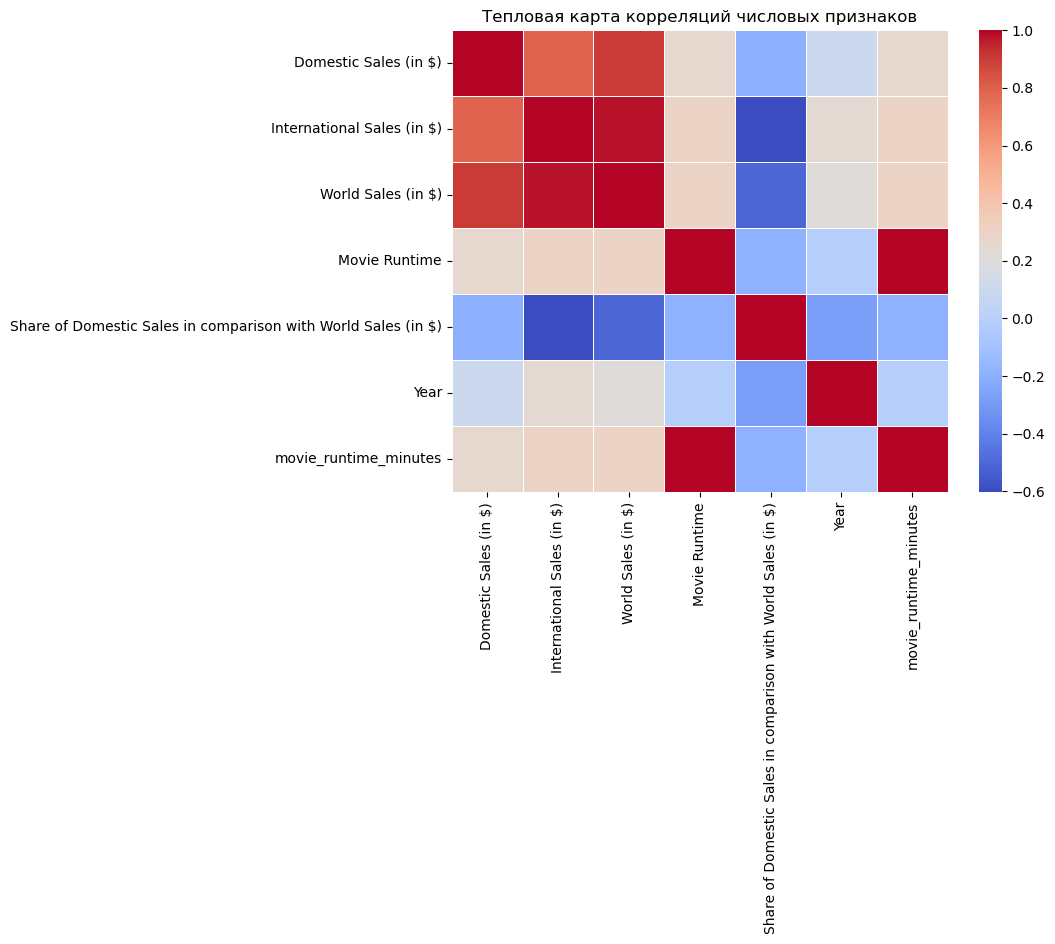

In [143]:
plt.figure(figsize=(8,6))
sns.heatmap(
    df.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
)

plt.title("Тепловая карта корреляций числовых признаков", fontsize=12)

plt.show()

взаимосвязь слабая

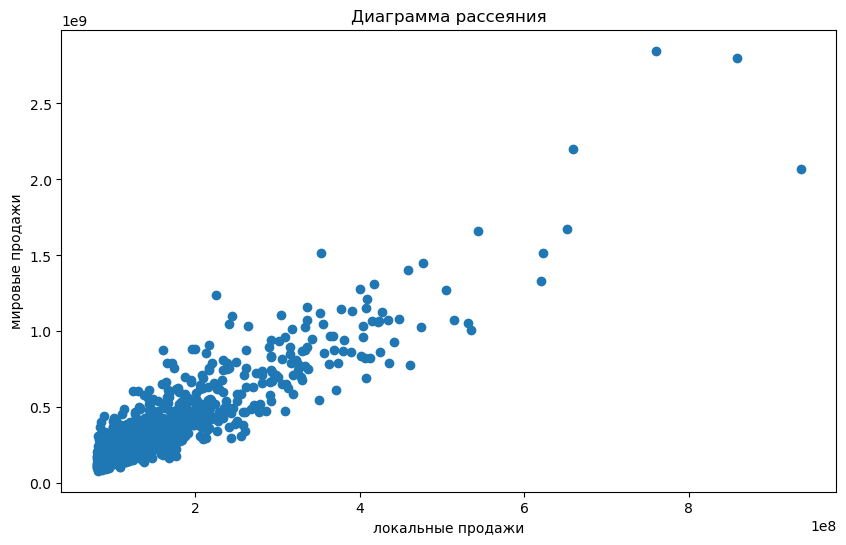

In [144]:
plt.figure(figsize=(10, 6))
plt.scatter(x = df['Domestic Sales (in $)'], y = df['World Sales (in $)'])
plt.title("Диаграмма рассеяния")
plt.xlabel("локальные продажи")
plt.ylabel("мировые продажи")

plt.show()

In [146]:
df.to_excel("Обработанные данные.xlsx", index=False)

🔹 **Задание 7. Визуализация корреляций**

1. Выведите корреляционную матрицу по числовым признакам в таблице.
2. Постройте тепловую карту по этим данным с названием графика.
3. Напишите в отдельной ячейке markdown, есть ли взаимосвязь между продолжительностью фильма и его сборами?
4. Постройте диаграмму рассеяния между признаками, у которых наибольшая корреляция (Подсказка: в документации найдите matplotlib scatter, какие обязательные параметры туда нужно передать).
5. Сохраните итоговую таблицу в excel.